<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | ML: Job offers' Fraud-Detection with NLP

## Introduction

In order to experience how to work in a ML project as a group, and to learn more on NLP we have been working on this dataset from Kaggle, [[Real or Fake] Fake Job Posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), that holds around 18K job descriptions out of which about 900 are fake. The data consists of both textual information and meta-information about the jobs. 

### Objectives

 We mainly wanted to create a **classification model using text data features and meta-features to predict which job descriptions are fraudulent**. As well as, finding out if there are **key traits/features** (words, entities, phrases) of job descriptions which are **intrinsically fraudulent**.

### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS



import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

## 1. Exploratory Data Analysis

### Context

As said above, we've worked on a dataset of job descriptions and their meta information in which a small proportion of these descriptions were fake or scam, which can be identified by the column "fraudulent".

**Columns**:
* `job_id` Unique Job ID
* `title` The title of the job ad entry.
* `location` Geographical location of the job ad.
* `department` Corporate department (e.g. sales).f
* `salary_range` Indicative salary range (e.g. $50,000-$60,000)
* `company_profile` A brief company description.
* `description` The details description of the job ad.
* `requirements` Enlisted requirements for the job opening.
* `benefits` Enlisted offered benefits by the employer.
* `telecommuting` True for telecommuting positions.
* `has_company_logo` True if company logo is present.
* `has_questions` True if screening questions are present.
* `employment_type` Full-type, Part-time, Contract, etc.
* `required_experience` Executive, Entry level, Intern, etc.
* `required_education` Doctorate, Master’s Degree, Bachelor, etc.
* `industry Automotive` IT, Health care, Real estate, etc.
* `function Consulting` Engineering, Research, Sales etc.
* `fraudulent` **target** Classification attribute

### Global EDA

#### Read dataset and check head

In [2]:
data = pd.read_csv("data/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Check shape

In [3]:
data.shape

(17880, 18)

#### Check dtypes and columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

#### Check nulls

In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Check duplicates

In [6]:
data.duplicated().sum()

0

#### Check uniques

In [7]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

#### Target variable distribution

In [8]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

### Numerical columns

In [9]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


At first we only got 5 numerical columns being one of them an index ("job_id").

#### See some descriptive statistics of numerical variables

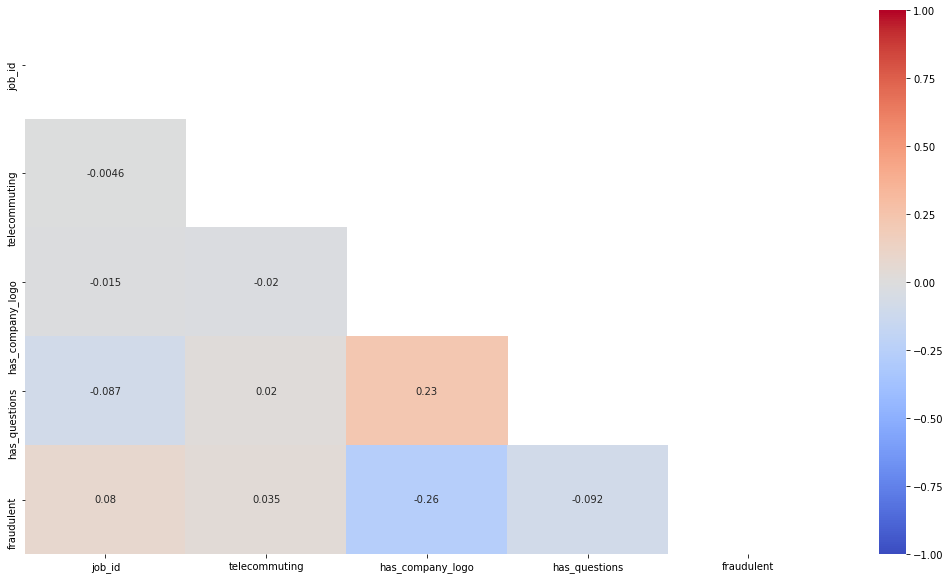

In [10]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), mask=mask, cmap='coolwarm', annot=True, vmin=-1, vmax=1) 

plt.show()

#### Comments

With the raw data we can only find a single correlationship with the target "fraudulent" that is somewhat significative:
*  It seems it is slightly more common for fraudulent job offers to not contain the company logo, though the relationship is of `-0.26`.

### Categorical variables

#### Visualization

In [11]:
data_1 = data.copy()

We will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

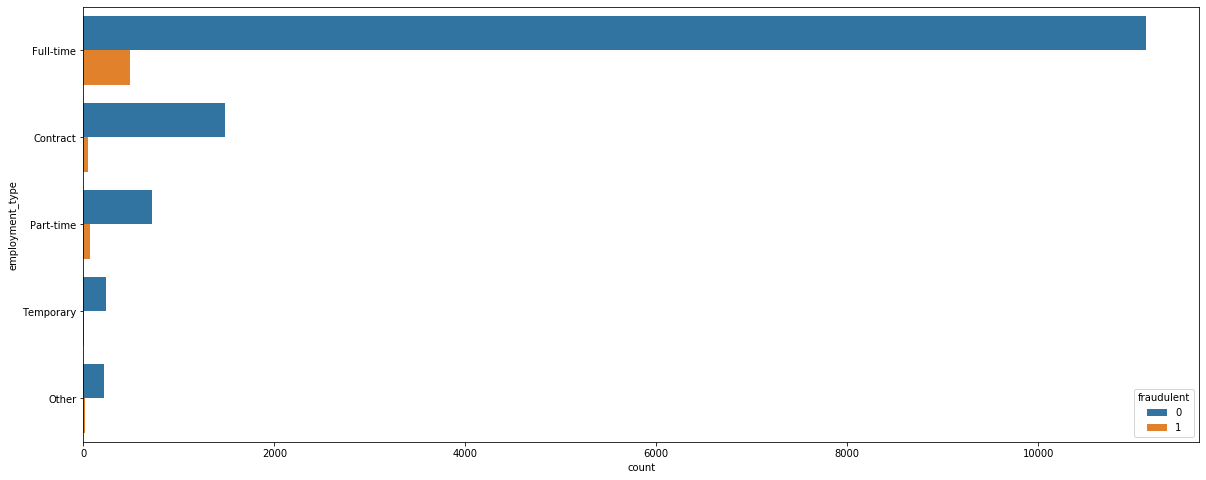

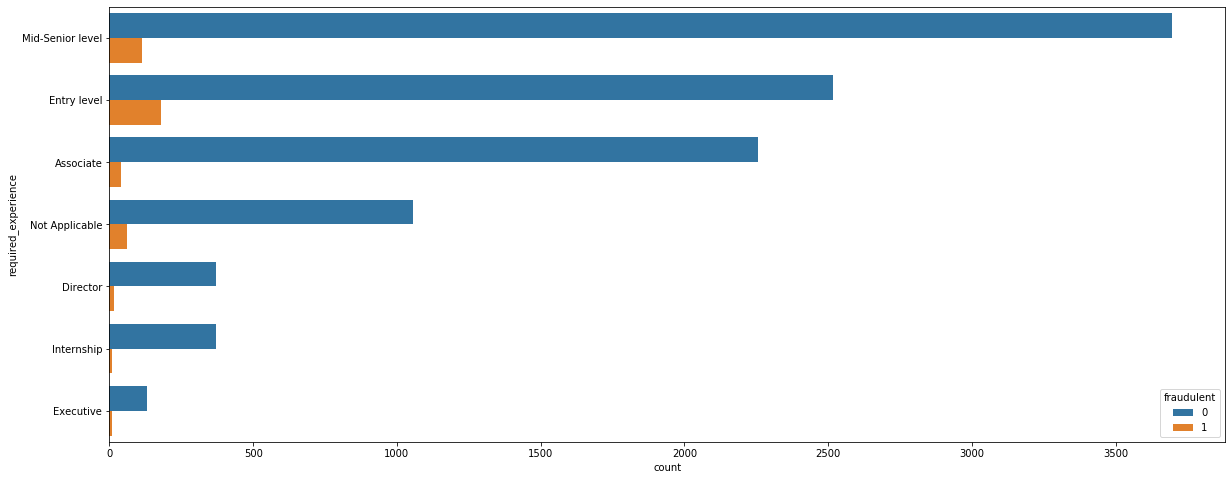

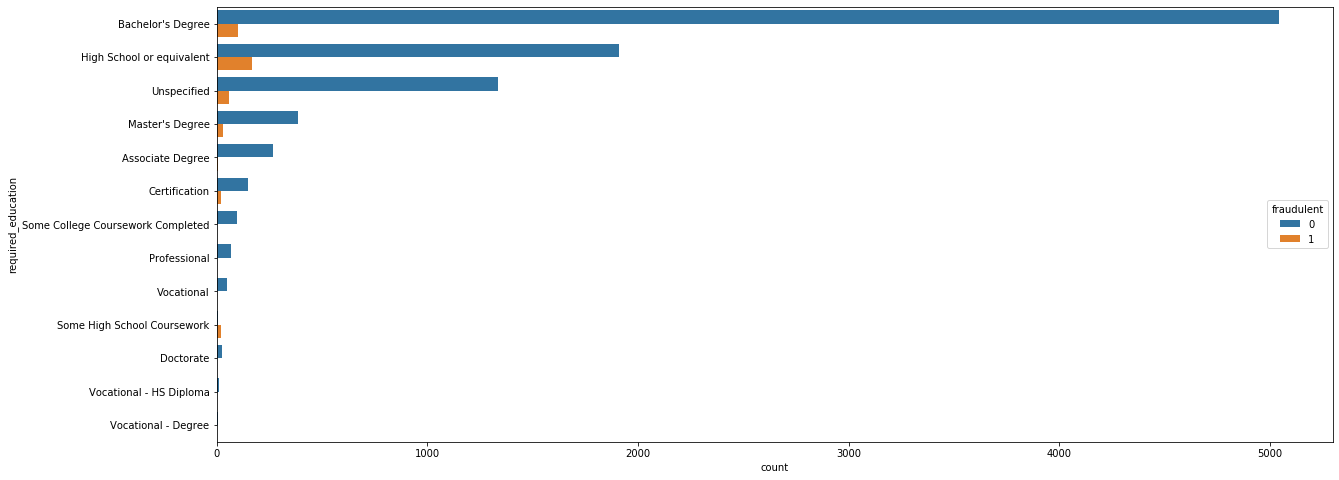

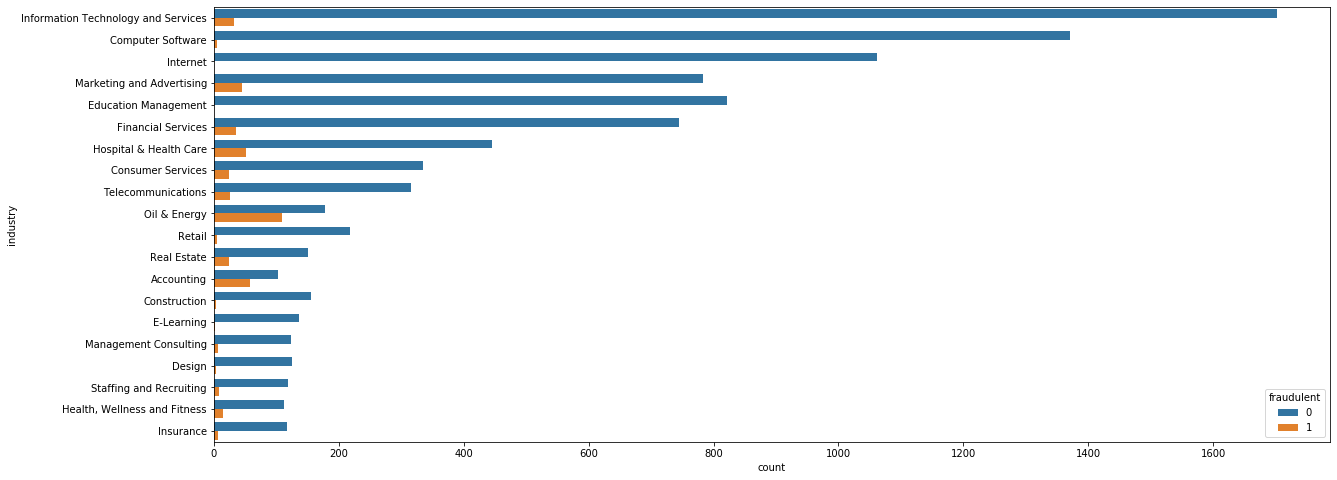

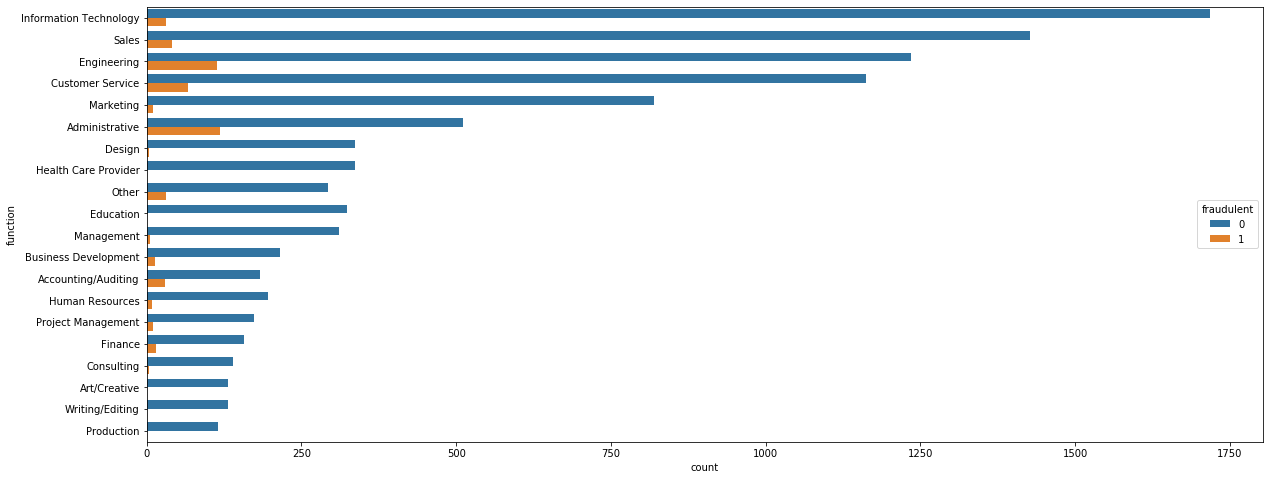

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:20].index)


plt.show()

We will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [13]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [14]:
for value in data_1[["title","department","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

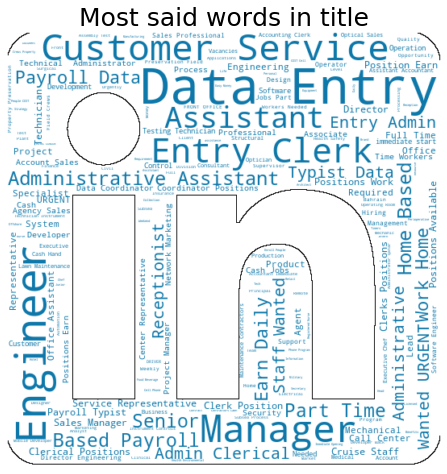

In [15]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(14, 120, 170)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["title"])

mask = np.array(Image.open(path.join(d, "images/LI-In-Bug.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/linkedin_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in title", fontsize=25)
plt.show()

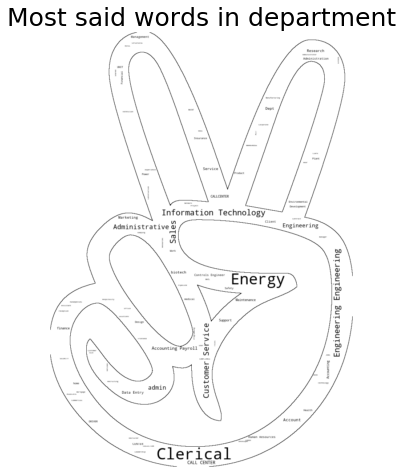

In [16]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(1, 1, 1)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["department"])

mask = np.array(Image.open(path.join(d, "images/AngelList_Black_Victory_Hand.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/angellist_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in department", fontsize=25)
plt.show()

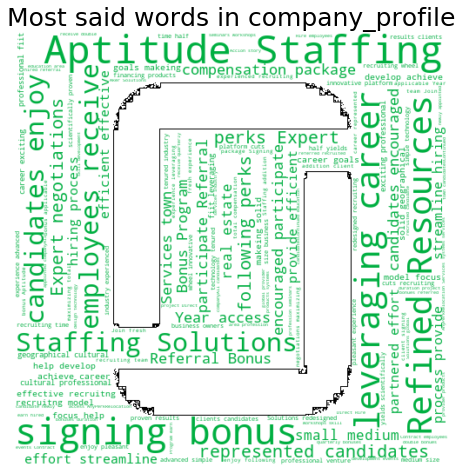

In [17]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(0, 175, 65)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["company_profile"])

mask = np.array(Image.open(path.join(d, "images/glassdoor-socialicon-rgb.jpg")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/glassdoor_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in company_profile", fontsize=25)
plt.show()

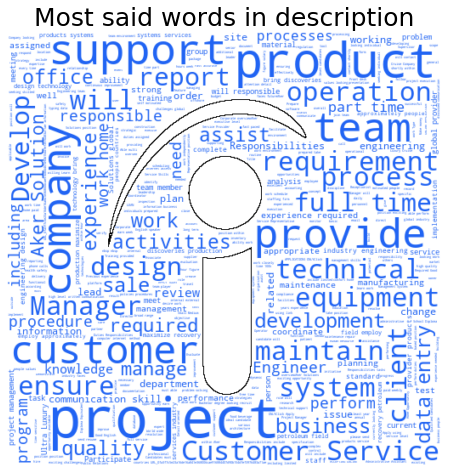

In [18]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(33, 100, 243)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["description"])

mask = np.array(Image.open(path.join(d, "images/Indeed_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/indeed_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in description", fontsize=25)
plt.show()

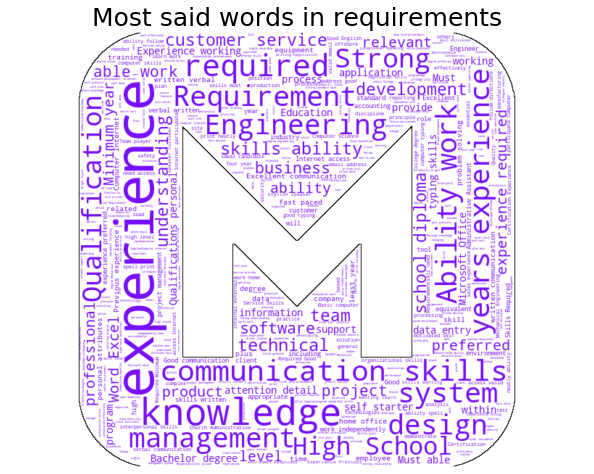

In [19]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(119, 14, 253)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["requirements"])

mask = np.array(Image.open(path.join(d, "images/moster_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/monster_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in requirements", fontsize=25)
plt.show()

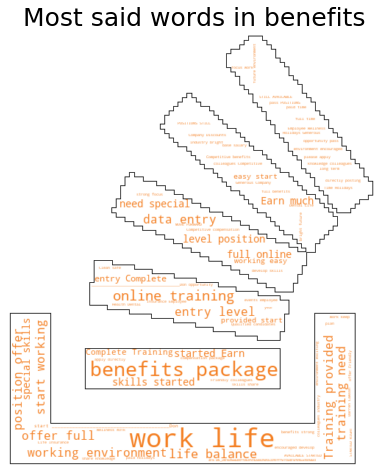

In [20]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(244, 128, 36)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["benefits"])

mask = np.array(Image.open(path.join(d, "images/stackoverflow_logo.PNG")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/stackoverflow_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most said words in benefits", fontsize=25)
plt.show()

#### Comments

It seems there is terms that are more frequent than others but we still can't establish any sort of relationship between those terms' frequencies and our target variable, or at least, we can't with those categorical variables where there are far too many unique values.

### Categorical columns: Text and lots of uniques 

In order to better appreciate if it may be a relationship between variables of pure text where there is plenty of different unique values, we will tokenize text columns' content to form a Bag of Words.

#### BoW

In [21]:
data_text = data[['job_id', 'title','department', 'company_profile', 'description', 'requirements', 'benefits']].copy()

In [22]:
data_text = data_text.fillna('')
text_columns = data_text[['job_id']]
text_columns['text'] = data_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
def clean_urls(column):
    '''
    This function takes a string and returns a string 
    with its urls removed and all the words in lowercase.
    '''
    return column.apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))



text_columns['text'] = clean_urls(text_columns['text'])

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
raise SystemExit("Stop right there! Run cells one by one till the end of this notebook.")

SystemExit: Stop right there! Run cells one by one till the end of this notebook.

C:\Users\Miguel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 15000000

In [27]:
def tokenize(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)


text_columns['text'] = text_columns['text'].apply(lambda row: tokenize(row))

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [28]:
pd_token = pd.DataFrame(text_columns, columns=['job_id', 'text'])
pd_token.head()

,job_id,text
0,1,marketing intern marketing food52 created grou...
1,2,customer service cloud video production succes...
2,3,commissioning machinery assistant cma valor se...
3,4,account executive washington dc sales passion ...
4,5,bill review manager spotsource solutions llc g...


In [29]:
pd_token.to_pickle("data/output_pickles/token.pkl")

#### Visualization

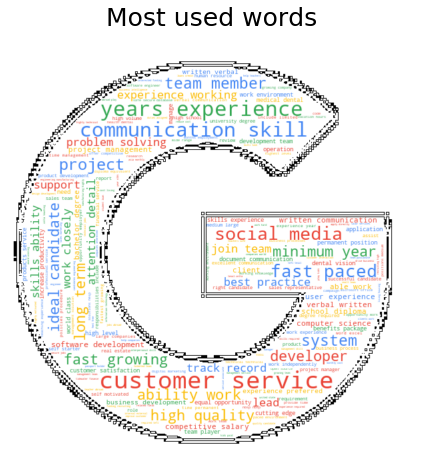

In [30]:
colors = ["rgb(52, 168, 83)", "rgb(251, 188, 5)", "rgb(66, 133, 244)", "rgb(234, 67, 53)"]
def grey_color_func(word, font_size, position, orientation, random_state=1,**kwargs):
    return random.choice(colors)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = "".join(pd_token["text"])

mask = np.array(Image.open(path.join(d, "images/logo_google.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/google_logo.png"))

plt.figure(figsize=(20,8))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis("off")
plt.title("Most used words", fontsize=25)
plt.show()

#### Comments

After tokenizing we can se that there's words or short expressions which are more common than others in "text" columns but there's still too much information and it is too raw as to get interesting insights from it.